In [6]:
import numpy as np
import rasterio
from rasterio.mask import mask
import shapely
import xarray as xr

In [10]:
aoi_bbox = (4.171371,50.684060,4.743004,50.877911)
aoi_bbox = (4.171371,50.684060,4.743004,50.877911) 

# General

### Generate transform coordinates

In [45]:
def generate_transform_coordinates(subset, transform, format="array"):
    """
    A function that generates coordinate arrays for the raster defined by the affine transform

    Args
        subset (np.array): A 2D numpy array that contains the raster where the relevant information is stored in
        transform (affine.Affine): The affine transformation matrix that is characteristic for the subset
        format (str, optional): Option to output format. Standard format is array (1D) format, alternative is matrix output.
    Returns
        longitudes, latitudes (np.array): coordinate arrays that have a similar dimension to the original subset array. Each cell is characterized by a longitude and latitude pair
    """
    #Extract subset array dimensions to determine grid dimensions
    height, width = subset.shape
    #Generate meshgrid to assign index to each pixel
    rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
    #Generate (lat, long) pairs based on the affine transform of the window ordered according to the generated indices
    longitudes, latitudes = rasterio.transform.xy(transform, rows, cols)
    if format=="array":
        return longitudes[:width], latitudes[::width]
    elif format=="matrix":
        return longitudes.reshape(height, width), latitudes.reshape(height, width)

In [35]:
test_url = 'https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly/clt/CHELSA_clt_01_1990_V.2.1.tif'
with rasterio.open(test_url) as src_file:
    #Define a window that will be used to sample the region of interest
    #Transform describes the affine transformation matrix that defines the raster that is being used
    window = rasterio.windows.from_bounds(*aoi_bbox, transform=src_file.transform)
    #Read the first band of the tif file. Files are single band
    subset = src_file.read(1, window=window)

In [36]:
subset

array([[6251, 6269, 6310, 6324, 6311, 6278, 6299, 6293, 6276, 6284, 6254,
        6245, 6247, 6256, 6274, 6253, 6252, 6259, 6267, 6292, 6293, 6282,
        6272],
       [6297, 6290, 6321, 6328, 6300, 6290, 6302, 6284, 6313, 6311, 6261,
        6247, 6250, 6249, 6271, 6270, 6270, 6244, 6278, 6274, 6269, 6279,
        6269],
       [6321, 6326, 6297, 6281, 6289, 6342, 6316, 6471, 6437, 6321, 6277,
        6367, 6399, 6331, 6311, 6295, 6274, 6238, 6311, 6247, 6351, 6366,
        6362],
       [6301, 6313, 6291, 6276, 6305, 6330, 6304, 6445, 6515, 6399, 6385,
        6439, 6454, 6401, 6333, 6301, 6278, 6225, 6319, 6241, 6344, 6356,
        6349],
       [6281, 6289, 6270, 6291, 6313, 6411, 6419, 6445, 6559, 6568, 6493,
        6379, 6321, 6323, 6292, 6266, 6272, 6245, 6265, 6244, 6284, 6309,
        6327],
       [6287, 6281, 6281, 6278, 6321, 6406, 6412, 6446, 6528, 6578, 6518,
        6342, 6283, 6292, 6275, 6270, 6288, 6252, 6235, 6275, 6258, 6276,
        6311],
       [6319, 6279, 63

In [37]:
window_transform = src_file.window_transform(window)
window_transform

Affine(0.02499999, 0.0, 4.1713709999999935,
       0.0, -0.02499999, 50.877911)

In [38]:
height, width = subset.shape
height, width

(8, 23)

In [39]:
longitudes, latitudes = rasterio.transform.xy(window_transform, rows, cols)
longitudes, latitudes

(array([4.18387099, 4.20887098, 4.23387097, 4.25887096, 4.28387095,
        4.30887094, 4.33387093, 4.35887092, 4.38387091, 4.4088709 ,
        4.43387089, 4.45887088, 4.48387087, 4.50887086, 4.53387085,
        4.55887084, 4.58387083, 4.60887082, 4.63387081, 4.6588708 ,
        4.68387079, 4.70887078, 4.73387077, 4.18387099, 4.20887098,
        4.23387097, 4.25887096, 4.28387095, 4.30887094, 4.33387093,
        4.35887092, 4.38387091, 4.4088709 , 4.43387089, 4.45887088,
        4.48387087, 4.50887086, 4.53387085, 4.55887084, 4.58387083,
        4.60887082, 4.63387081, 4.6588708 , 4.68387079, 4.70887078,
        4.73387077, 4.18387099, 4.20887098, 4.23387097, 4.25887096,
        4.28387095, 4.30887094, 4.33387093, 4.35887092, 4.38387091,
        4.4088709 , 4.43387089, 4.45887088, 4.48387087, 4.50887086,
        4.53387085, 4.55887084, 4.58387083, 4.60887082, 4.63387081,
        4.6588708 , 4.68387079, 4.70887078, 4.73387077, 4.18387099,
        4.20887098, 4.23387097, 4.25887096, 4.28

In [44]:
longitudes[:width],latitudes[::width]

(array([4.18387099, 4.20887098, 4.23387097, 4.25887096, 4.28387095,
        4.30887094, 4.33387093, 4.35887092, 4.38387091, 4.4088709 ,
        4.43387089, 4.45887088, 4.48387087, 4.50887086, 4.53387085,
        4.55887084, 4.58387083, 4.60887082, 4.63387081, 4.6588708 ,
        4.68387079, 4.70887078, 4.73387077]),
 array([50.865411  , 50.84041102, 50.81541102, 50.79041103, 50.76541105,
        50.74041105, 50.71541106, 50.69041108]))

In [4]:
def read_bounding_box(url, bbox, generate_coordinates=True):
    """
    A function that reads a subset defined by a bounding box from a cloud hosted tif file and returns the data within to the local user

    Args
        url (str): A URL that point to a cloud optimized tif file. This function is written with URL's generated by the `format_url_month_ts` function in mind.
        bbox (tuple<float>): a bounding box defined in the standard 
    Returns
        subset (np.ndarray): An array counting the measurements within the the bounding box

         If generate_coordinates is True, also returns:
            longitude (np.ndarray): Longitude grid matching the subset shape.
            latitude (np.ndarray): Latitude grid matching the subset shape.
    """
    if url==0:
        return 0
    with rasterio.open(url) as src_file:
        #Define a window that will be used to sample the region of interest
        #Transform describes the affine transformation matrix that defines the raster that is being used
        window = rasterio.windows.from_bounds(*bbox, transform=src_file.transform)
        #Read the first band of the tif file. Files are single band
        subset = src_file.read(1, window=window)
    if generate_coordinates:
        window_transform = src_file.window_transform(window)
        longitudes, latitudes = generate_transform_coordinates(subset, window_transform)
        return longitudes, latitudes, subset
    else:
        return subset

def read_polygon_area(url, shp_file, shp_path="", generate_coordinates=True):
    """
    A function that reads all data contained within the boundary of a polygon defined by a shapefile

    Args
        url (str): A URL that point to a cloud optimized tif file. This function is written with URL's generated by the `format_url_month_ts` function in mind.
        shp_file (str): Filename of the shapefile that contains the the polygon that describes the area of interest
        shp_path (str, optional): Directory where the shapefile is stored
        generate_coordinates (bool, optional): Option to generate coordinate raster associated with the subset
    Returns
        subset (np.array): An array counting the measurements within the polygon. Values outside the polygon is set to a negative value.
        
        If generate_coordinates is True, also returns:
            longitude (np.ndarray): Longitude grid matching the subset shape.
            latitude (np.ndarray): Latitude grid matching the subset shape.
    """
    if url==0:
        return 0
    #Read the shapefile 
    polygon = gpd.read_file(os.path.join(shp_path, shp_file))
    with rasterio.open(url) as src:
        #Convert the polygon to the CRS used within the src file
        polygon = polygon.to_crs(src.crs)
        #Mask out the polygon of interest and crop it out of the image
        out_img, out_transform = mask(src, polygon.geometry.apply(shapely.geometry.mapping), crop=True)
    #Returned array is 3D where the first axis is the number of bands. The tif files contain a single band in this case so this dimension can be dropped
    subset = out_img[0]
    if generate_coordinates:
        longitudes, latitudes = generate_transform_coordinates(subset, out_transform)
        return longitudes, latitudes, subset
    else:
        return subset

In [5]:
def chech_spatial_homo(data):
    """
    Check if the raster that is associated with the extracted data is consistent homogenous across the different subsets
    """
    longitudes_arrays = [item[0] for item in data]
    latitude_arrays = [item[1] for item in data]
    
    # Check all are equal to the first one
    longitudes_equal = all(np.array_equal(arr, longitudes_arrays[0]) for arr in longitudes_arrays)
    latitudes_equal = all(np.array_equal(arr, latitude_arrays[0]) for arr in latitude_arrays)
    #Assure that both latitude and longitudes are homogenous
    return longitudes_equal==latitudes_equal

# CHELSA Monthly

## S3

In [14]:
def format_url_month_ts(var, month, year, 
                        base_url="https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/monthly", 
                        version="V.2.1",
                        year_range=range(1979,2020)):
    """
    Generates the link to the S3 bucket where the CHELSA monthly time series is stores

    Args
        var (str): The abbreviation of the variable of interest. The options for this are "clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"
        month (int): An integer representing the month of interest
        year (int): An integer representing the year of interest
        base_url (str, optional): The base of the URL to the files of interest. This should not be changed expect in the case of a version upgrade or migration of the S3 bucket
        version (str, optional): The version of CHELSA
    Returns
        file_url (str): The URL that links to the file of interest
    """
    # Available variables for the monthly timeseries
    var_opt = ["clt", "cmi", "hurs", "pet", "pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin", "vpd"]
    if var not in var_opt:
        raise ValueError(f"Invalid variable name: {var}. Variable must be one of the following options {var_opt}")
    if month not in range(1,13):
        raise ValueError(f"Month invalid: {month}. Please use a number between 1 and 12")
    if year not in year_range:
        raise ValueError(f"Year invalid: {year}. Please use a number between {year_range[0]} and {year[-1]}")
    #Some variables start at the second month of 1979 instead of the first one
    diff_ts = ["cmi","pet","sfcWind", "tas", "tasmax", "tasmin", "vpd"]
    if var in diff_ts and month==1 and year==1979:
        return 0
    #Returns the formatted string, months are automatically converted to the correct string format where single digits have zero padding
    return f"{base_url}/{var}/CHELSA_{var}_{month:02d}_{year}_{version}.tif"

## Cubing

In [17]:
def generate_month_year_range(start_month, end_month, start_year, end_year):
    """
    Function to generate a list of month year pairs that need to be sampled

    Args
        start_month (int): The first month of the time range that needs to be included
        end_month (int): The end month of the time range that needs to be included
        start_year (int): The first year of the time range that needs to be included
        end_year (int): The last month of the time range that needs to be included
    
    Returns
        datetimes (list<tuple<int>>): a list consisting of (month, year) tuples  
    """
    datetimes = []
    year, month = start_year, start_month
    while (year < end_year) or (year == end_year and month <= end_month):
        datetimes.append((month, year))
        # Increment month/year
        month += 1
        if month > 12:
            month = 1
            year += 1
    return datetimes
    
def chelsa_month_ts(var, bbox, start_month, end_month, start_year, end_year):
    """
    return a data array in xarray 
        - spatial dimensions described
        - temporal dimension described
    """
    datetimes = generate_month_year_range(start_month, end_month, start_year, end_year)
    urls = [format_url_month_ts(var, dt[0], dt[1]) for dt in datetimes]
    data = [read_bounding_box(url, bbox) for url in urls]
    if chech_spatial_homo(data):
        var_data = [item[2] for item in  data]
        longitudes = data[0][0]
        latitudes = data[0][1]
        datetimes = np.array([f"{dt[1]}-{dt[0]:02d}" for dt in datetimes], dtype='datetime64[M]')
        dataArray = xr.DataArray(var_data, 
                                 dims=("time", "lat", "lon"),
                                 coords={"time":datetimes, "lat":latitudes, "lon":longitudes})
        return dataArray

In [78]:
test_month = chelsa_month_ts("hurs", aoi_bbox, 1, 3, 1990, 1990)

C:\Users\niels\AppData\Local\Temp\ipykernel_38452\2725880897.py:39: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataArray = xr.DataArray(var_data,


In [79]:
test_month

<xarray.DataArray (time: 3, lat: 23, lon: 69)>
array([[[6945, 6946, 6948, ..., 6876, 6876, 6879],
        [6942, 6941, 6941, ..., 6884, 6884, 6885],
        [6949, 6947, 6946, ..., 6896, 6897, 6897],
        ...,
        [6949, 6948, 6946, ..., 6941, 6951, 6960],
        [6947, 6944, 6942, ..., 6953, 6961, 6969],
        [6946, 6943, 6940, ..., 6964, 6971, 6979]],

       [[6093, 6094, 6096, ..., 6053, 6054, 6056],
        [6092, 6092, 6093, ..., 6062, 6064, 6066],
        [6098, 6098, 6098, ..., 6073, 6074, 6076],
        ...,
        [6096, 6095, 6093, ..., 6109, 6116, 6124],
        [6095, 6093, 6092, ..., 6116, 6123, 6131],
        [6095, 6093, 6090, ..., 6127, 6132, 6138]],

       [[6017, 6019, 6022, ..., 5969, 5974, 5987],
        [6025, 6022, 6023, ..., 5974, 5976, 5980],
        [6032, 6030, 6028, ..., 5992, 5995, 5995],
        ...,
        [6044, 6036, 6030, ..., 6100, 6116, 6131],
        [6030, 6028, 6018, ..., 6113, 6126, 6138],
        [6022, 6017, 6017, ..., 6120, 6134, 6148]]], dtype=uint16)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 1990-03-01
  * lat      (lat) float64 50.87 50.87 50.86 50.85 ... 50.72 50.71 50.7 50.69
  * lon      (lon) float64 4.176 4.184 4.192 4.201 ... 4.717 4.726 4.734 4.742

In [67]:
test_month.lat[0]-test_month.lat[1]

<xarray.DataArray 'lat' ()>
array(0.02499999)

In [70]:
test_month.lon[1]-test_month.lon[0]

<xarray.DataArray 'lon' ()>
array(0.02499999)

# Reference CHELSA debug

## S3 code

In [58]:
def format_url_clim_ref_period(var,
                               ref_period = "1981-2010",
                               base_url="https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/climatologies/1981-2010",
                               version="V.2.1"):
    """
    Generate URL's that link to the reference data tif files for the BIOCLIM+ variables for the reference period 1980-2010
    """
    var_opt = var_opt = ['ai','bio10','bio11','bio12','bio13','bio14','bio15','bio16','bio17','bio18','bio19','bio1','bio2','bio3',
                         'bio4','bio5','bio6','bio7','bio8','bio9','clt_max','clt_mean','clt_min','clt_range','cmi_max','cmi_mean',
                         'cmi_min','cmi_range','fcf','fgd','gdd0','gdd10','gdd5','gddlgd0','gddlgd10','gddlgd5','gdgfgd0','gdgfgd10',
                         'gdgfgd5','gsl','gsp','gst','hurs_max','hurs_mean','hurs_min','hurs_range','kg0','kg1','kg2','kg3','kg4','kg5',
                         'lgd','ngd0','ngd10','ngd5','npp','pet_penman_max','pet_penman_mean','pet_penman_min','pet_penman_range',
                         'rsds_max','rsds_min','rsds_mean','rsds_range','scd','sfcWind_max','sfcWind_mean','sfcWind_min','sfcWind_range',
                         'swb','swe','vpd_max','vpd_mean','vpd_min','vpd_range']
    if var not in var_opt:
        raise ValueError(f"Invalid variable name: {var}. Variable must be one of the following options {var_opt}")
    #"CHELSA_ai_1981-2010_V.2.1.tif"
    return f"{base_url}/bio/CHELSA_{var}_{ref_period}_{version}.tif"

def format_url_clim_ref_monthly(var, month,
                                ref_period = "1981-2010",
                                base_url="https://os.zhdk.cloud.switch.ch/chelsav2/GLOBAL/climatologies/1981-2010",
                                version="V.2.1"):
    """
    Generate URL's that link to the reference data tif files on a monthly basis for the reference period 1980-2010 
    """
    var_opt=["clt","cmi","hurs","ncdf","pet","pr","rsds","sfcWind","tas","tasmax","tasmin", "vpd"]
    if var not in var_opt:
        raise ValueError(f"Invalid variable name: {var}. Variable must be one of the following options {var_opt}")
    if month not in range(1,13):
        raise ValueError(f"Month invalid: {month}. Please use a number between 1 and 12")
    return f"{base_url}/{var}/CHELSA_{var}_{month:02d}_{ref_period}_{version}.tif"

## Cubing data

In [84]:
def chelsa_clim_ref_period(vars, bbox, 
                           ref_period="1981-2010"):
    if len(vars)==1:
        url = format_url_clim_ref_period(vars[0])
        longitudes, latitudes, data = read_bounding_box(url, bbox)
        if chech_spatial_homo:
            dataArray = xr.DataArray(data, 
                                     dims=("lat", "long"), 
                                     coords={"lat":latitudes,"long":longitudes})
            return dataArray
    else:
        urls = [format_url_clim_ref_period(var) for var in vars]
        data = [read_bounding_box(url, bbox) for url in urls]
        if chech_spatial_homo:
            clim_data = [item[2] for item in data]
            longitudes = data[0][0]
            latitudes = data[0][1]
            dataset = xr.Dataset(dict(zip(vars, [(["lat", "long"], var_data) for var_data in clim_data])),
                                 coords={"lat": latitudes,"long": longitudes})
            dataset.attrs["Reference Period"] = ref_period
            return dataset

In [81]:
test_single=chelsa_clim_ref_period(["bio1"], aoi_bbox)

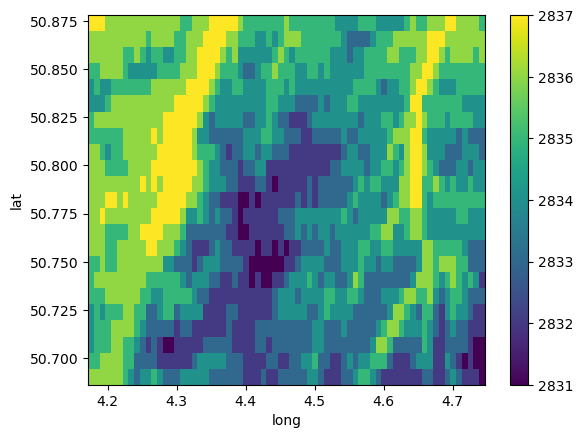

In [82]:
test_single.plot()

In [87]:
test_multi = test_single=chelsa_clim_ref_period(["bio"+str(i) for i in range(1, 20)], aoi_bbox)
test_multi

<xarray.Dataset>
Dimensions:  (lat: 23, long: 69)
Coordinates:
  * lat      (lat) float64 50.87 50.87 50.86 50.85 ... 50.72 50.71 50.7 50.69
  * long     (long) float64 4.176 4.184 4.192 4.201 ... 4.717 4.726 4.734 4.742
Data variables: (12/19)
    bio1     (lat, long) uint16 2837 2837 2837 2836 2836 ... 2832 2832 2832 2831
    bio2     (lat, long) uint16 71 71 71 71 71 71 71 71 ... 71 71 71 71 71 71 71
    bio3     (lat, long) float32 3.3 3.3 3.3 3.29 3.29 ... 3.27 3.27 3.27 3.26
    bio4     (lat, long) uint16 5316 5310 5310 5324 5309 ... 5393 5400 5403 5382
    bio5     (lat, long) uint16 2954 2954 2954 2954 2954 ... 2951 2951 2950 2950
    bio6     (lat, long) uint16 2739 2739 2739 2739 2739 ... 2734 2734 2733 2733
    ...       ...
    bio14    (lat, long) uint16 499 500 502 504 506 508 ... 510 511 513 516 519
    bio15    (lat, long) uint16 118 118 117 117 116 116 ... 111 111 111 111 111
    bio16    (lat, long) uint16 2321 2324 2328 2335 2342 ... 2277 2286 2297 2312
    bio17    (lat, long) uint16 1776 1779 1785 1791 1799 ... 1827 1834 1845 1854
    bio18    (lat, long) uint16 2263 2265 2268 2274 2281 ... 2277 2286 2297 2312
    bio19    (lat, long) uint16 2126 2130 2136 2144 2153 ... 2150 2157 2167 2176
Attributes:
    Reference Period:  1981-2010

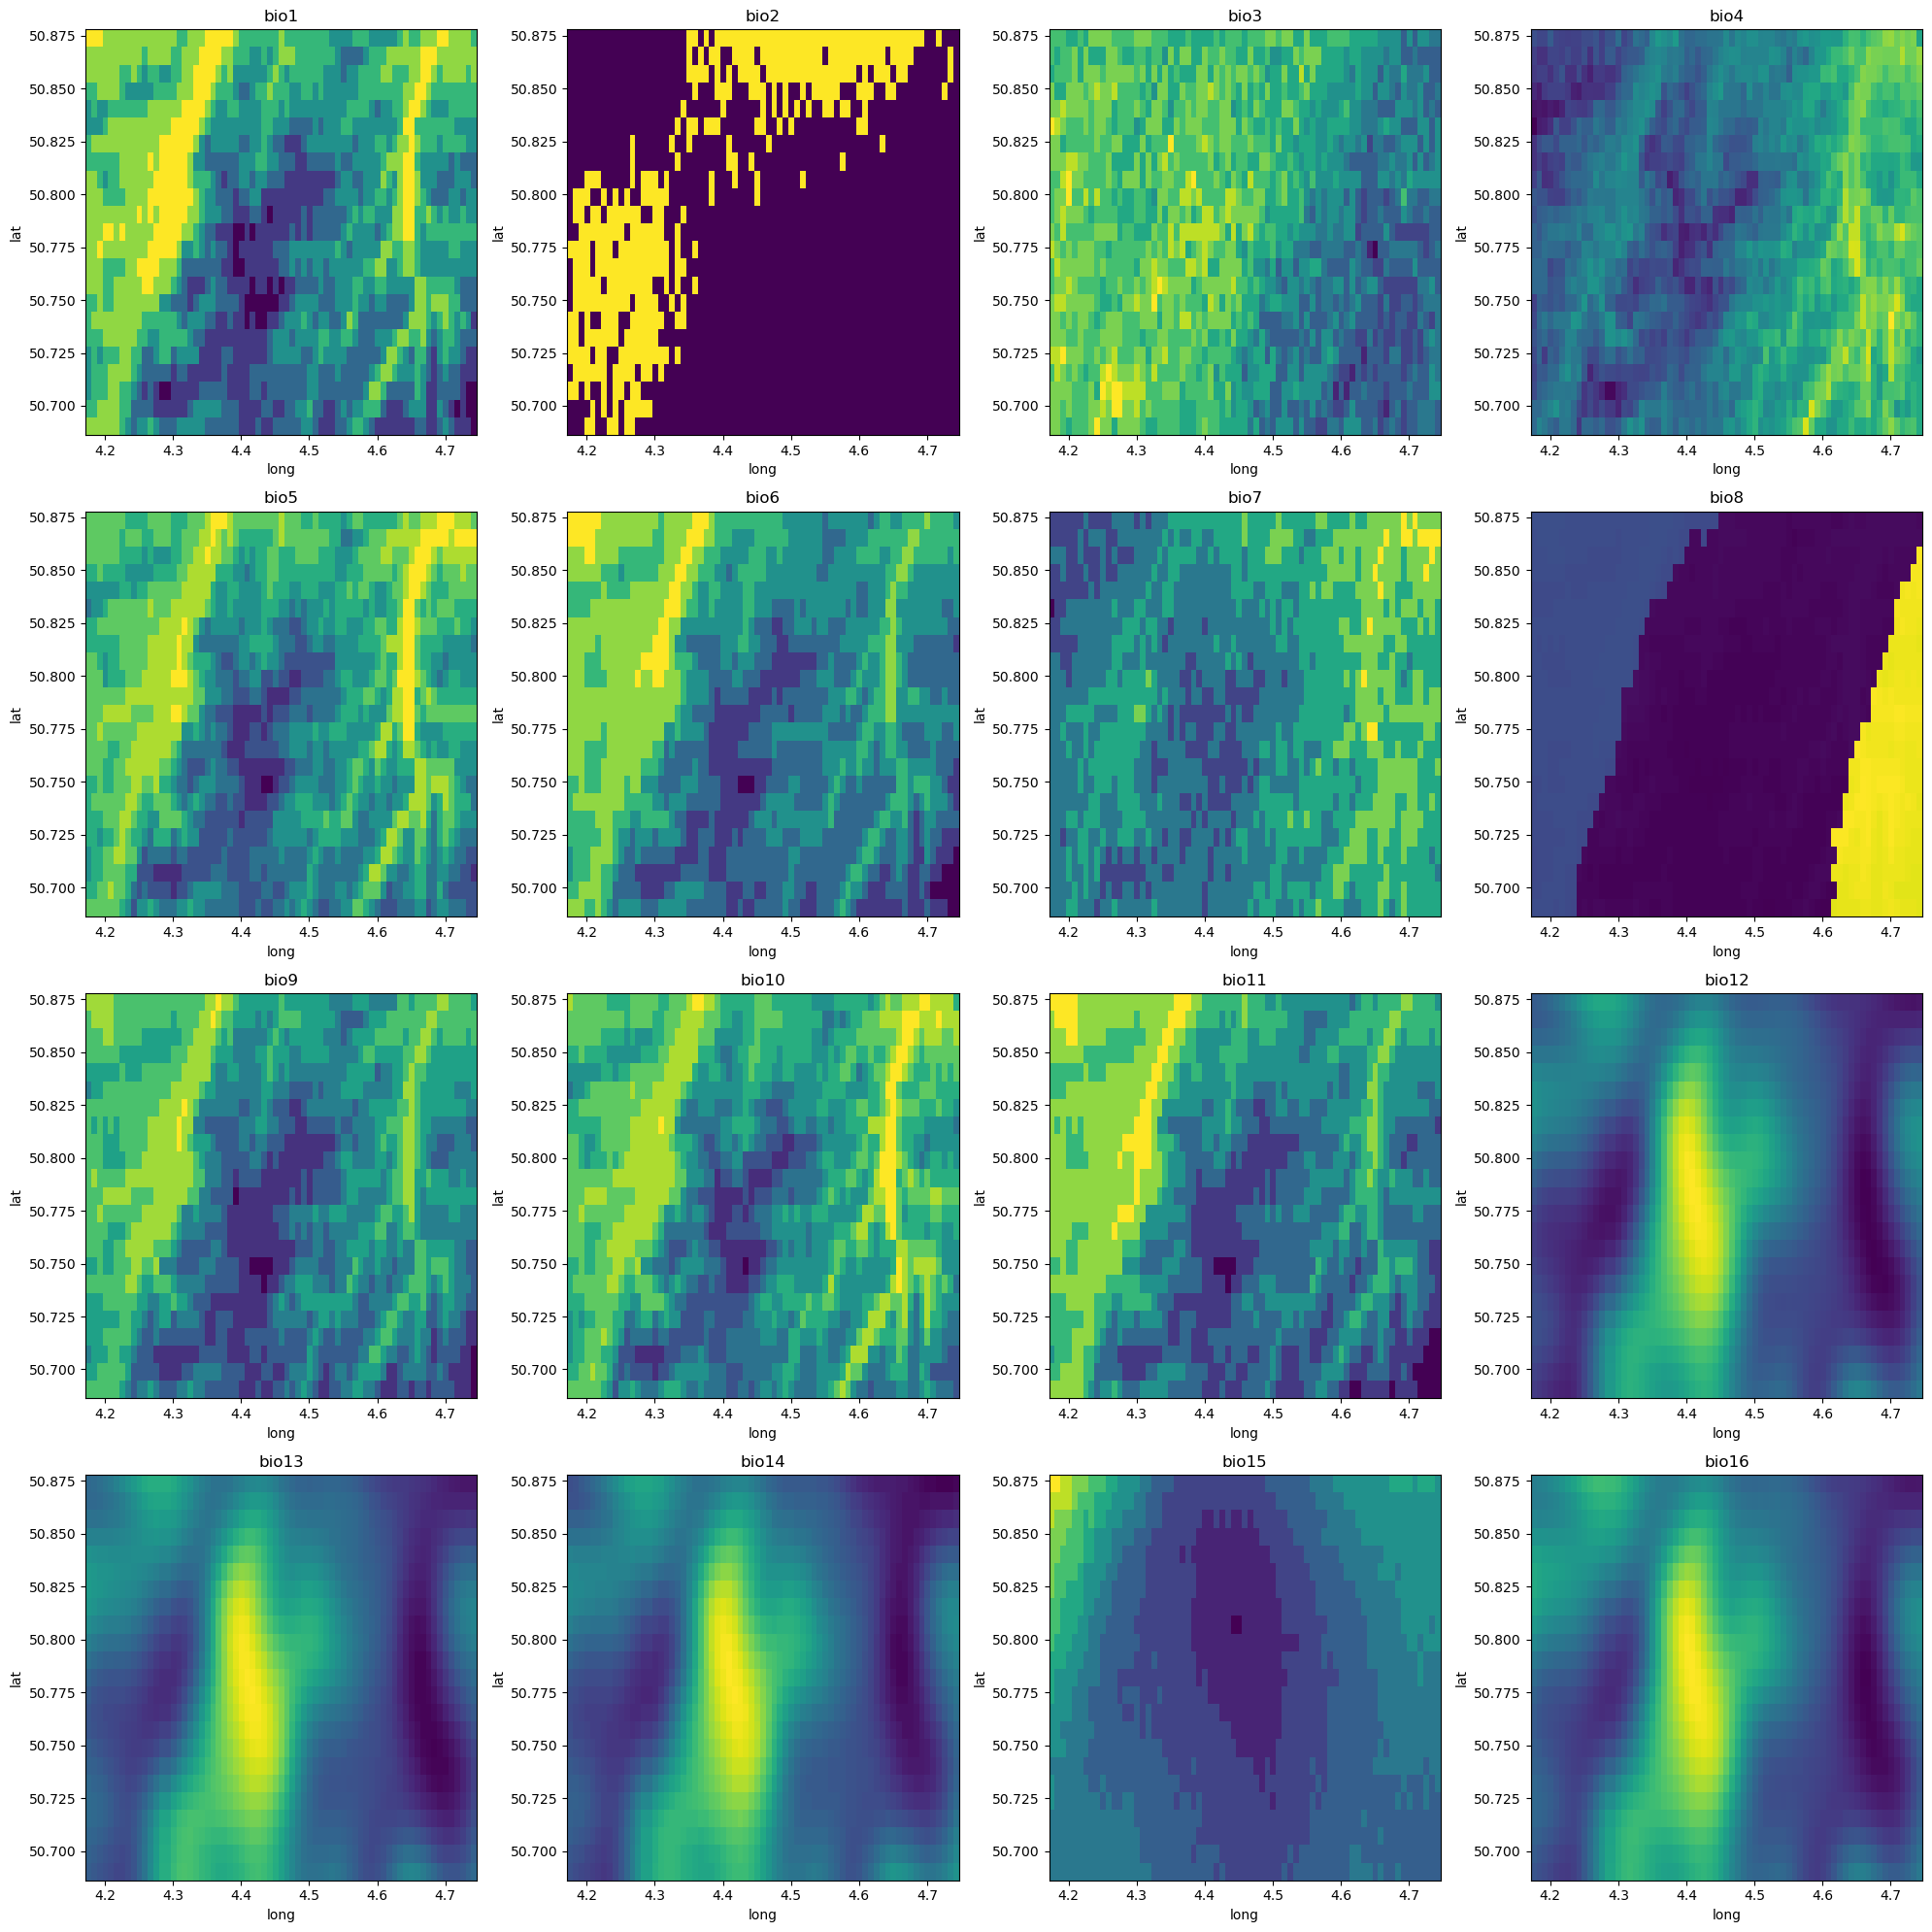

In [96]:
import matplotlib.pyplot as plt

# Prepare variable names
var_names = list(test_multi.data_vars)[:16]

# Create figure and axes
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 2 rows x 4 columns
axes = axes.flatten()

# Loop over variables and plot
for i, var_name in enumerate(var_names):
    ax = axes[i]
    data_var = test_multi[var_name]
    
    # Reduce dimensions if necessary (e.g., select first time slice)
    while data_var.ndim > 2:
        data_var = data_var.isel({dim: 0 for dim in data_var.dims if data_var.sizes[dim] > 1})
    
    # Plot to the specified axis
    data_var.plot(ax=ax, add_colorbar=False)
    ax.set_title(var_name)

# Hide unused axes (if any)
for j in range(len(var_names), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [97]:
test_multi["bio13"]

<xarray.DataArray 'bio13' (lat: 23, long: 69)>
array([[795, 796, 798, ..., 762, 762, 762],
       [795, 795, 796, ..., 767, 767, 767],
       [800, 799, 800, ..., 773, 774, 773],
       ...,
       [794, 793, 791, ..., 777, 782, 787],
       [792, 790, 788, ..., 782, 786, 791],
       [790, 788, 786, ..., 788, 792, 795]], dtype=uint16)
Coordinates:
  * lat      (lat) float64 50.87 50.87 50.86 50.85 ... 50.72 50.71 50.7 50.69
  * long     (long) float64 4.176 4.184 4.192 4.201 ... 4.717 4.726 4.734 4.742

In [98]:
test_multi["bio14"]

<xarray.DataArray 'bio14' (lat: 23, long: 69)>
array([[499, 500, 502, ..., 481, 481, 482],
       [500, 500, 501, ..., 485, 485, 486],
       [504, 504, 504, ..., 490, 490, 491],
       ...,
       [503, 502, 501, ..., 505, 509, 513],
       [501, 500, 499, ..., 509, 512, 516],
       [500, 498, 497, ..., 513, 516, 519]], dtype=uint16)
Coordinates:
  * lat      (lat) float64 50.87 50.87 50.86 50.85 ... 50.72 50.71 50.7 50.69
  * long     (long) float64 4.176 4.184 4.192 4.201 ... 4.717 4.726 4.734 4.742